## Read Data

In [37]:
X = []
Y = []
with open('datasets/test.txt','r') as f:
    next(f)
    for i in f:
        i,x,y = i.split()
        X.append(float(x))
        Y.append(float(y))
print(X)
print(Y)

[3.385, 0.48, 1.35, 465.0, 36.33, 27.66, 14.83, 1.04, 4.19, 0.425, 0.101, 0.92, 1.0, 0.005, 0.06, 3.5, 2.0, 1.7, 2547.0, 0.023, 187.1, 521.0, 0.785, 10.0, 3.3, 0.2, 1.41, 529.0, 207.0, 85.0, 0.75, 62.0, 6654.0, 3.5, 6.8, 35.0, 4.05, 0.12, 0.023, 0.01, 1.4, 250.0, 2.5, 55.5, 100.0, 52.16, 10.55, 0.55, 60.0, 3.6, 4.288, 0.28, 0.075, 0.122, 0.048, 192.0, 3.0, 160.0, 0.9, 1.62, 0.104, 4.235]
[44.5, 15.5, 8.1, 423.0, 119.5, 115.0, 98.2, 5.5, 58.0, 6.4, 4.0, 5.7, 6.6, 0.14, 1.0, 10.8, 12.3, 6.3, 4603.0, 0.3, 419.0, 655.0, 3.5, 115.0, 25.6, 5.0, 17.5, 680.0, 406.0, 325.0, 12.3, 1320.0, 5712.0, 3.9, 179.0, 56.0, 17.0, 1.0, 0.4, 0.25, 12.5, 490.0, 12.1, 175.0, 157.0, 440.0, 179.5, 2.4, 81.0, 21.0, 39.2, 1.9, 1.2, 3.0, 0.33, 180.0, 25.0, 169.0, 2.6, 11.4, 2.5, 50.4]


In [36]:
X = []
Y = []
with open('datasets/test.txt','r') as f:
    #next(f)
    f.readline()
    for i in f:
        i,x,y = i.split()
        X.append(float(x))
        Y.append(float(y))
print(X)
print(Y)

[3.385, 0.48, 1.35, 465.0, 36.33, 27.66, 14.83, 1.04, 4.19, 0.425, 0.101, 0.92, 1.0, 0.005, 0.06, 3.5, 2.0, 1.7, 2547.0, 0.023, 187.1, 521.0, 0.785, 10.0, 3.3, 0.2, 1.41, 529.0, 207.0, 85.0, 0.75, 62.0, 6654.0, 3.5, 6.8, 35.0, 4.05, 0.12, 0.023, 0.01, 1.4, 250.0, 2.5, 55.5, 100.0, 52.16, 10.55, 0.55, 60.0, 3.6, 4.288, 0.28, 0.075, 0.122, 0.048, 192.0, 3.0, 160.0, 0.9, 1.62, 0.104, 4.235]
[44.5, 15.5, 8.1, 423.0, 119.5, 115.0, 98.2, 5.5, 58.0, 6.4, 4.0, 5.7, 6.6, 0.14, 1.0, 10.8, 12.3, 6.3, 4603.0, 0.3, 419.0, 655.0, 3.5, 115.0, 25.6, 5.0, 17.5, 680.0, 406.0, 325.0, 12.3, 1320.0, 5712.0, 3.9, 179.0, 56.0, 17.0, 1.0, 0.4, 0.25, 12.5, 490.0, 12.1, 175.0, 157.0, 440.0, 179.5, 2.4, 81.0, 21.0, 39.2, 1.9, 1.2, 3.0, 0.33, 180.0, 25.0, 169.0, 2.6, 11.4, 2.5, 50.4]


## Split Dataset

In [13]:
import numpy as np
ntrain = int(0.8*len(X))
ntest = len(X) -ntrain

xtrain = np.array(X[:ntrain]).reshape((ntrain,1))
xtest = np.array(X[ntrain:]).reshape((ntest,1))

ytrain = np.array(Y[:ntrain])
ytest = np.array(Y[ntrain:])

## Build model with LinearRegression()

In [35]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(xtrain,ytrain)
print(lr.coef_)
print(lr.intercept_)
print("y =",round(lr.intercept_,2),"+",round(lr.coef_[0],2),"* x")

[0.96198408]
113.19494160508106
y = 113.19 + 0.96 * x


## Predict value

In [19]:
ytest_predict = lr.predict(xtest)
print(list(zip(ytest,np.round(ytest_predict,2))))

[(21.0, 116.66), (39.2, 117.32), (1.9, 113.46), (1.2, 113.27), (3.0, 113.31), (0.33, 113.24), (180.0, 297.9), (25.0, 116.08), (169.0, 267.11), (2.6, 114.06), (11.4, 114.75), (2.5, 113.29), (50.4, 117.27)]


## Evaluate Model Accuracy

In [22]:
import sklearn.metrics as sm
print("Mean Absolute Error :",round(sm.mean_absolute_error(ytest,ytest_predict),2))
print("Mean Squared Error :",round(sm.mean_squared_error(ytest,ytest_predict),2))
print("Median Absolute Error :",round(sm.median_absolute_error(ytest,ytest_predict),2))
print("Explained Variance Score :",round(sm.explained_variance_score(ytest,ytest_predict),2))
print("R^2 Score :",round(sm.r2_score(ytest,ytest_predict),2))

Mean Absolute Error : 101.55
Mean Squared Error : 10526.93
Median Absolute Error : 110.31
Explained Variance Score : 0.94
R^2 Score : -1.95


## Ploting the data

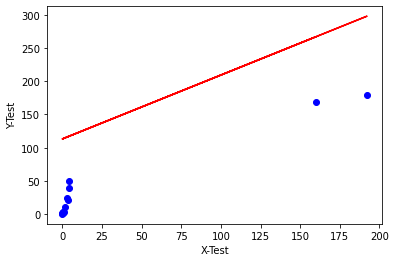

In [26]:
import matplotlib.pyplot as plt
plt.scatter(xtest,ytest,color="blue")
plt.plot(xtest,ytest_predict,color="red")
plt.xlabel("X-Test")
plt.ylabel("Y-Test")
plt.show()

## Saving Model

In [32]:
import pickle
pickle.dump(lr,open('mymodel.pkl','wb'))

## Load Model

In [34]:
nlr = pickle.load(open('mymodel.pkl','rb'))
x = [[50.0]]
y = nlr.predict(x)
print(y)

[161.2941458]
